<a href="https://colab.research.google.com/github/karima33/python_projects/blob/main/TODO__CheckPoint_Traffic_Sign_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as a Jupyter notebook document. Before exporting the notebook to ipynb, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> Notebook (.ipynb)**. Include the finished document along with this notebook as your submission. 


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive') # You can either use your drive or work directly on colab with temporary import

Mounted at /content/gdrive


---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data
# If you have a folder in your Drive named traffic-signs-data you do so, else change directory

training_file = '/content/gdrive/MyDrive/Colab Notebooks/datasets/train.p'
validation_file= '/content/gdrive/MyDrive/Colab Notebooks/datasets/valid.p'
testing_file = '/content/gdrive/MyDrive/Colab Notebooks/datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [14]:
# Please complete None with your code
#-------------------------------------------------------------------------
import pandas as pd 
signs = []
signnames = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/Signnames.csv', delimiter=',', header=0)
for row in range(signnames.shape[0]):
     signs.append(signnames.iloc[row, 1])    
    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
signs

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vechiles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vechiles',
 'Vechiles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [8]:
# Please complete None with your code
#-------------------------------------------------------------------------
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation =  X_valid.shape[0]

# TODO: Number of testing examples.
n_test =  X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max()-y_train.min()+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of valid examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of valid examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [9]:

# In this part you should One-hot encode all Y-s vectors using
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_valid=to_categorical(y_valid, 43)
y_test = to_categorical(y_test, 43)

In [10]:
X = X_train
Y = y_train



### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

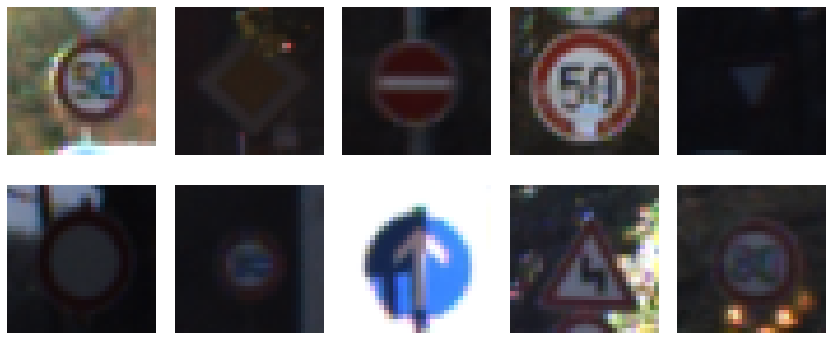

In [11]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
def show_images(X,Y,r,c):
  fig, axs = plt.subplots(r,c, figsize=(15, 6))
  fig.subplots_adjust(hspace = .2, wspace=.001)
  axs = axs.ravel()
  for i in range (r*c): # if rows = 2 and columns = 5 i should take 10 values
      index = random.randint(0, len(X))
      image = X[index]
      axs[i].axis('off')
      axs[i].imshow(image)
      #axs[i].set_title(Y[index])
  plt.show()    

# show image of 10 random data points
rows = 2
columns = 5
show_images (X,Y,rows,columns)

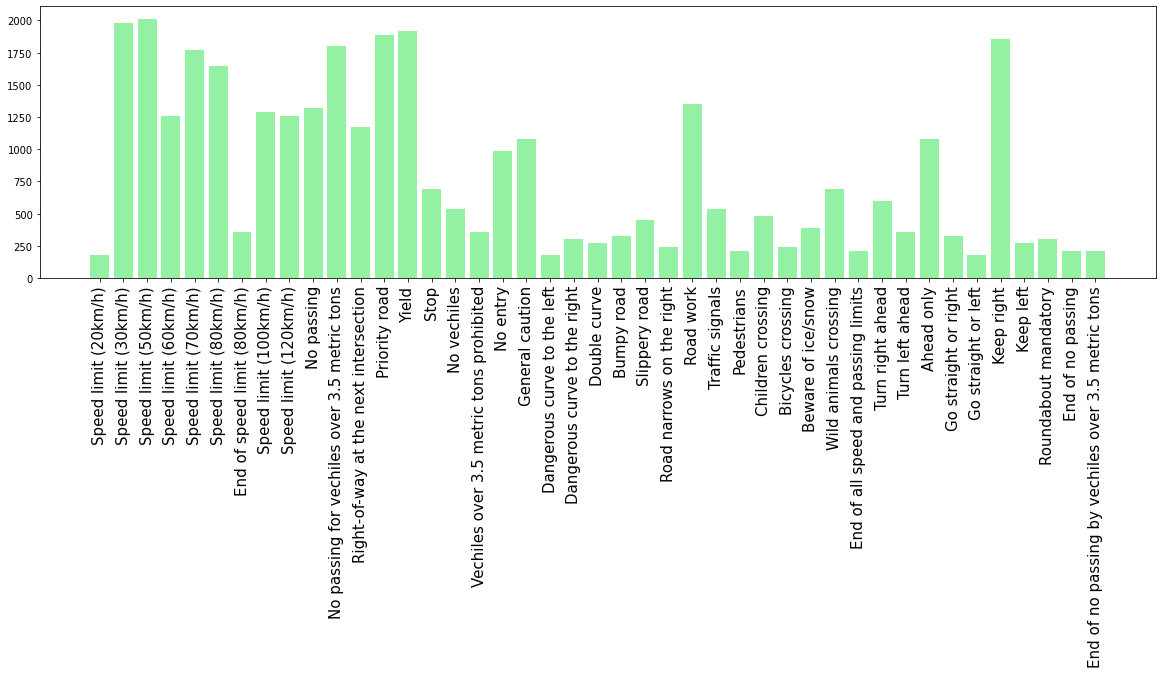

In [15]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_train, return_counts=True)
#names is a list of traffic signs, Remember that we already have a list : signs
names = signs
y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.9,0.4,0.6) )

plt.xticks(y_pos, names, fontsize=15, rotation=90)

plt.show()

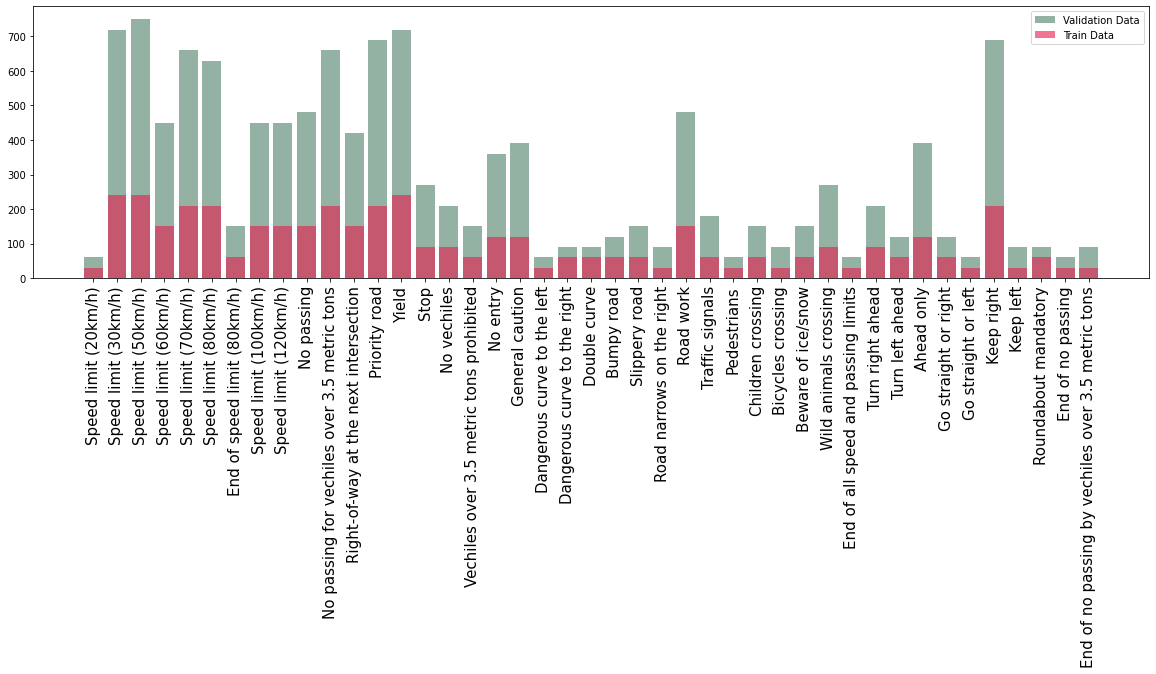

In [16]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_test, return_counts=True)
item1, count1 = np.unique(y_valid, return_counts=True)

names = signs
names1 = signs

y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.5,0.4,0.2), label="Validation Data" )

plt.bar(item1, count1, alpha=0.6, color = (0.9,0.1,0.3,0.2), label="Train Data" )

plt.xticks(y_pos, names, fontsize=15, rotation=90)
plt.legend()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
# gray scale
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

In [18]:
# normalization Here 
X_train = (X_train)/255
X_valid = (X_valid)/255
X_test = (X_test)/255

In [19]:
# Shuffle your data here 
from sklearn.utils import shuffle

# Shuffle the training
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [20]:
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

Next cells should be useful for data augmentation

In [21]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

In [22]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

In [23]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

In [ ]:
# if u do have a file that contains new_train data RUN ME
with open("/content/gdrive/My Drive/traffic-signs-data/new_train.p","rb") as f:
    data = pickle.load(f)
new_X_train,y_train = data["images"],data["labels"]


In [ ]:
# shuffle data  
# CODE

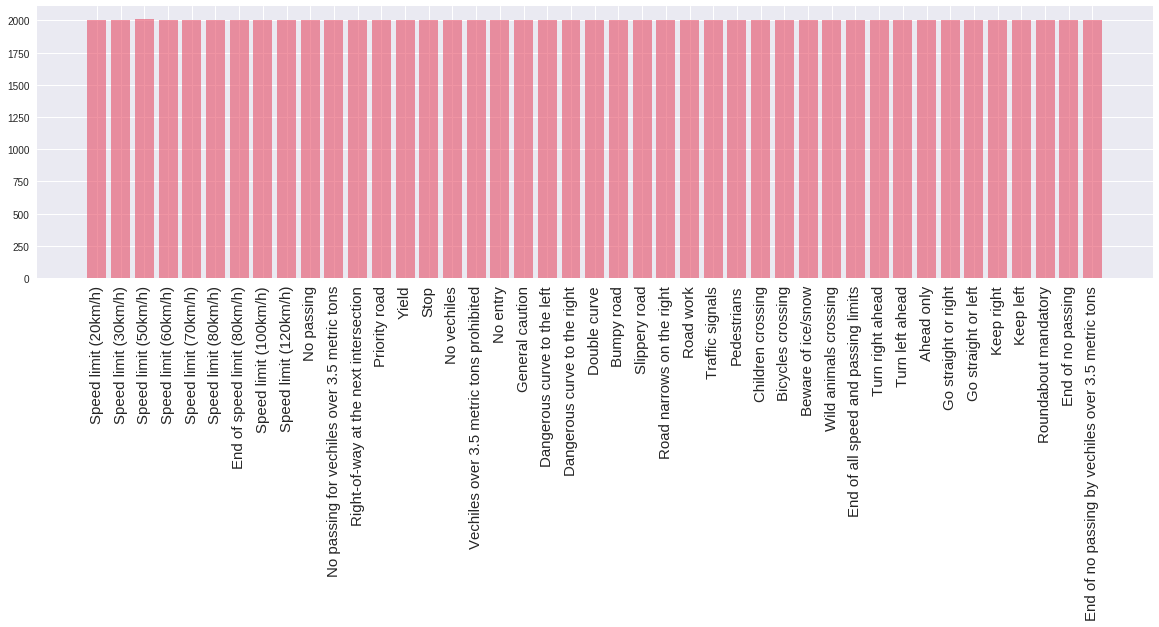

In [ ]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_train, return_counts=True)
names = None
y_pos = np.arange(len(names))
plt.bar(None, None, alpha=0.6, color = (0.9,0.3,0.4,0.6) )
plt.xticks(y_pos, names, fontsize=15, rotation=90)
plt.show()

### Model Architecture

In [29]:
IMAGE_SIZE = [32, 32]
epochs = 100
batch_size = 64


In [32]:
# Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

In [33]:
from keras.utils import np_utils
from keras.layers import (Conv2D, MaxPooling2D,
                          Input, Flatten, Dense, 
                          BatchNormalization, 
                          Activation, AveragePooling2D,
                          GlobalAveragePooling2D,LeakyReLU, Dropout, Add)
from keras.models import Model
from keras import layers
from keras.regularizers import l2
from keras.callbacks import Callback

### Normalization

In [34]:
y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(y_test)

In [56]:
X = simple_conv(X_input, 64, 3, 2)

X = resnet(X, 64)
X = conv(X, 128, 3, 2)
X = resnet(X, 128)
X = conv(X, 256, 1, 1) # test
X = resnet(X, 256) # test
X = conv(X, 512, 3, 2)
X = resnet(X, 512)
X = conv(X, 1024, 3, 2)
X = resnet(X, 1024)

X = simple_conv(X, 128, 1, 1)
X = simple_conv(X, 128, 1, 1)

X = GlobalAveragePooling2D()(X)
X = BatchNormalization()(X) # imp
output = Dropout(0.25)(X)
output = Dense(512, activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
out = Dense(43, activation='softmax')(output)

### Terminate Training after Validation Accuracy reaches above 97%

In [57]:
class TerminateOnBaseline(Callback):
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor='acc', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [58]:
callbacks = [TerminateOnBaseline(monitor='val_acc', baseline=0.97)]

In [59]:
### Resnet block o be used in the model

In [60]:
def resnet(X, channel):
    X_short = X
    X = Conv2D(channel, (1, 1), strides = (1, 1), kernel_initializer='he_normal',use_bias=False, kernel_regularizer=l2(1e-4))(X)
    X = Conv2D(channel, (1, 1), strides = (1, 1), kernel_initializer='he_normal',use_bias=False, kernel_regularizer=l2(1e-4))(X)
    X = BatchNormalization()(X)
    X = Add()([X, X_short])##############
    X = LeakyReLU(alpha=0.1)(X)
    return X

In [61]:
def simple_conv(X, channel, f, s):
    X = Conv2D(channel, (f, f), strides = (s, s), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = LeakyReLU(alpha=0.1)(X)
    return X

def conv(X, channel, f, s):
    X = Conv2D(channel, (f, f), strides = (s, s), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = LeakyReLU(alpha=0.1)(X)
    X = Conv2D(channel, (1, 1), strides = (1, 1), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    return X

### Model Architecture

### Train, Validate and Test the Model

In [62]:
model = Model(inputs = X_input, outputs = out)

In [63]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
train=model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=32, callbacks=callbacks)

Epoch 1/20
   5/1088 [..............................] - ETA: 37s - loss: 5.7804 - accuracy: 0.0250

1088/1088 [==============================] - 30s 25ms/step - loss: 1.7628 - accuracy: 0.7273 - val_loss: 0.9774 - val_accuracy: 0.9025
Epoch 2/20
1088/1088 [==============================] - 30s 28ms/step - loss: 0.8006 - accuracy: 0.9223 - val_loss: 0.6850 - val_accuracy: 0.9227
Epoch 3/20
1088/1088 [==============================] - 28s 25ms/step - loss: 0.5176 - accuracy: 0.9442 - val_loss: 0.5215 - val_accuracy: 0.9259
Epoch 4/20
1088/1088 [==============================] - 25s 23ms/step - loss: 0.3351 - accuracy: 0.9583 - val_loss: 0.4426 - val_accuracy: 0.9329
Epoch 5/20
1088/1088 [==============================] - 24s 22ms/step - loss: 0.2510 - accuracy: 0.9651 - val_loss: 0.2482 - val_accuracy: 0.9628
Epoch 6/20
1088/1088 [==============================] - 25s 23ms/step - loss: 0.2051 - accuracy: 0.9692 - val_loss: 0.2117 - val_accuracy: 0.9633
Epoch 7/20
1088/1088 [==============================] - 24s 22ms/step - loss: 0.1655 - accuracy: 0.9758 - val_loss: 0.2247 - val_accura

### Final Validation Score 

In [45]:
valid = model.predict(X_valid)
valid_score = len(y_valid[y_valid.argmax(axis=1)==valid.argmax(axis=1)])/len(y_valid)
print(f"Validation Score = {valid_score*100:0.2f}%")

138/138 [==============================] - 1s 6ms/step
Validation Score = 97.03%


### Final Test Score

In [46]:
y_test_predict = model.predict(X_test)
test_score = len(y_test[y_test.argmax(axis=1)==y_test_predict.argmax(axis=1)])/len(y_test)
print(f"Test Score = {test_score*100:0.2f}%")

395/395 [==============================] - 2s 6ms/step
Test Score = 95.59%


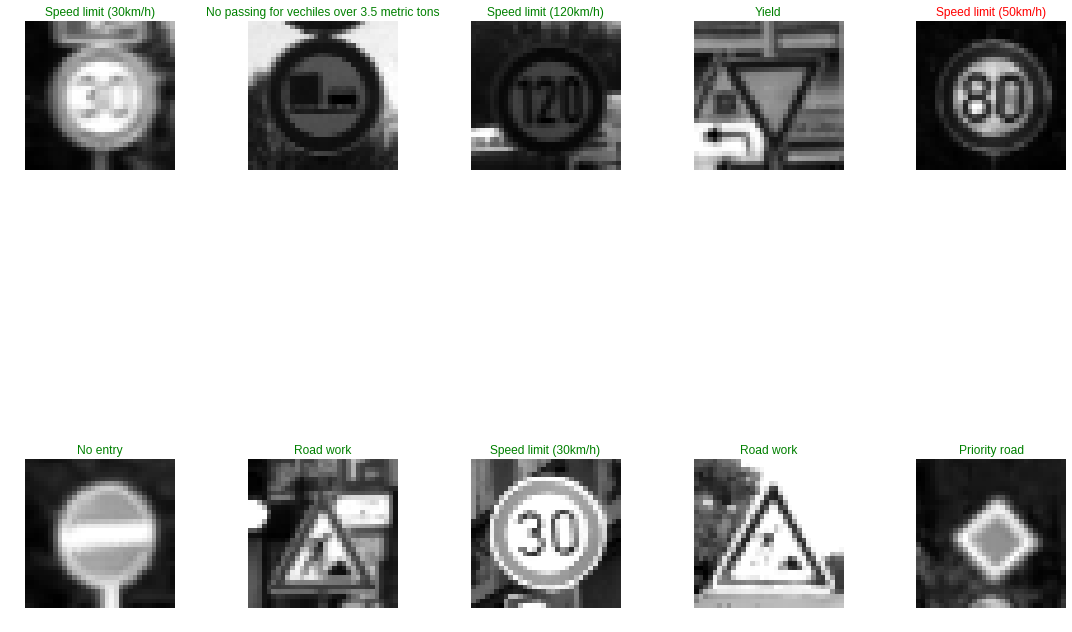

In [ ]:
# PLOT IMAGES WITH PREDICTED SIGNS

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }